In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import datetime

In [2]:
URL='https://archives.nseindia.com/content/indices/ind_nifty50list.csv'
df=pd.read_csv(URL, index_col='Company Name')
df

df["Symbol"].to_list()

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'DUMMYREL',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'ITC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LTIM',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

In [3]:
start=datetime.datetime(2017, 11, 6)
end=datetime.datetime(2023, 11, 6)

In [4]:
ticks = df["Symbol"].to_list()
ticks=[tick+'.NS' for tick in ticks]

In [5]:
def get_data(ticks,start,end):
    d=pd.DataFrame()
    for i in ticks:
        stock=yf.Ticker(i).history(start=start,end=end)['Close']
        stock=stock.rename(i)
        d=pd.concat([d,stock],axis=1)
    return d
    
d=get_data(ticks,start,end)


DUMMYREL.NS: No timezone found, symbol may be delisted


In [6]:
corr_matrix = d.corr()
corr_matrix

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,WIPRO.NS
ADANIENT.NS,1.000000,0.913103,0.878077,0.861280,0.672473,0.783304,0.836140,0.861401,0.305418,0.869762,...,0.909091,0.794404,0.857194,0.718349,0.909579,0.710250,0.904689,0.777095,0.807408,0.622005
ADANIPORTS.NS,0.913103,1.000000,0.919166,0.908595,0.685283,0.839385,0.898937,0.909550,0.505307,0.830043,...,0.867076,0.872779,0.908720,0.778525,0.813061,0.829267,0.888907,0.865252,0.908113,0.812933
APOLLOHOSP.NS,0.878077,0.919166,1.000000,0.964724,0.676834,0.864806,0.951959,0.947930,0.508025,0.913166,...,0.905542,0.946697,0.959951,0.759771,0.841980,0.919331,0.960955,0.832422,0.951901,0.853386
ASIANPAINT.NS,0.861280,0.908595,0.964724,1.000000,0.629811,0.865699,0.970278,0.930658,0.549480,0.894301,...,0.846928,0.961668,0.971922,0.659480,0.785569,0.894668,0.932136,0.808707,0.916775,0.852006
AXISBANK.NS,0.672473,0.685283,0.676834,0.629811,1.000000,0.713369,0.728115,0.745210,0.376684,0.574285,...,0.659871,0.638837,0.572185,0.584063,0.732035,0.608883,0.750848,0.769045,0.751022,0.502689
BAJAJ-AUTO.NS,0.783304,0.839385,0.864806,0.865699,0.713369,1.000000,0.845970,0.794467,0.576935,0.852714,...,0.854202,0.822823,0.888477,0.764453,0.847774,0.710203,0.871456,0.739580,0.900349,0.668039
BAJFINANCE.NS,0.836140,0.898937,0.951959,0.970278,0.728115,0.845970,1.000000,0.972272,0.580169,0.861205,...,0.814988,0.951843,0.932447,0.652397,0.764296,0.914058,0.936659,0.847713,0.918584,0.856450
BAJAJFINSV.NS,0.861401,0.909550,0.947930,0.930658,0.745210,0.794467,0.972272,1.000000,0.533836,0.848954,...,0.839657,0.905966,0.892226,0.718593,0.787971,0.922500,0.940376,0.871104,0.910312,0.847262
BPCL.NS,0.305418,0.505307,0.508025,0.549480,0.376684,0.576935,0.580169,0.533836,1.000000,0.498583,...,0.322965,0.510203,0.573330,0.382379,0.272575,0.519213,0.434786,0.525651,0.586991,0.590981
BHARTIARTL.NS,0.869762,0.830043,0.913166,0.894301,0.574285,0.852714,0.861205,0.848954,0.498583,1.000000,...,0.895751,0.837150,0.921126,0.721345,0.847958,0.752775,0.919852,0.691393,0.853374,0.656633


In [7]:
neg_corr=[]
stocks=set()
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if corr_matrix[i][j]<0:
            stocks.add(i)
            stocks.add(j)
            neg_corr.append((i,j,corr_matrix[i][j]))
neg_corr

[('ADANIENT.NS', 'INDUSINDBK.NS', -0.23831098856475283),
 ('ADANIPORTS.NS', 'INDUSINDBK.NS', -0.22827042154206617),
 ('APOLLOHOSP.NS', 'INDUSINDBK.NS', -0.36917582544048055),
 ('ASIANPAINT.NS', 'INDUSINDBK.NS', -0.4654459682075997),
 ('BAJAJ-AUTO.NS', 'INDUSINDBK.NS', -0.2437003769441956),
 ('BAJFINANCE.NS', 'INDUSINDBK.NS', -0.36231586966185636),
 ('BAJAJFINSV.NS', 'HEROMOTOCO.NS', -0.007460886586828643),
 ('BAJAJFINSV.NS', 'INDUSINDBK.NS', -0.2366834433649731),
 ('BPCL.NS', 'COALINDIA.NS', -0.13783742544713815),
 ('BPCL.NS', 'INDUSINDBK.NS', -0.2620684575389559),
 ('BHARTIARTL.NS', 'INDUSINDBK.NS', -0.4528676143019707),
 ('BRITANNIA.NS', 'INDUSINDBK.NS', -0.3640082126231353),
 ('CIPLA.NS', 'INDUSINDBK.NS', -0.3664102845701188),
 ('COALINDIA.NS', 'BPCL.NS', -0.13783742544713815),
 ('COALINDIA.NS', 'DIVISLAB.NS', -0.08459099216818089),
 ('COALINDIA.NS', 'DRREDDY.NS', -0.09346305877507106),
 ('COALINDIA.NS', 'HDFCLIFE.NS', -0.2886778146091195),
 ('DIVISLAB.NS', 'COALINDIA.NS', -0.084590

In [8]:
value=pd.DataFrame(neg_corr)

In [9]:
value.sort_values(by=2,ascending=True)

,0,1,2
50,INDUSINDBK.NS,DRREDDY.NS,-0.699217
20,DRREDDY.NS,INDUSINDBK.NS,-0.699217
62,INDUSINDBK.NS,NESTLEIND.NS,-0.632129
81,NESTLEIND.NS,INDUSINDBK.NS,-0.632129
49,INDUSINDBK.NS,DIVISLAB.NS,-0.612728
...,...,...,...
66,INDUSINDBK.NS,SBIN.NS,-0.017016
94,UPL.NS,HEROMOTOCO.NS,-0.015811
32,HEROMOTOCO.NS,UPL.NS,-0.015811
29,HEROMOTOCO.NS,BAJAJFINSV.NS,-0.007461


Text(0, 0.5, 'DRREDDY.NS')

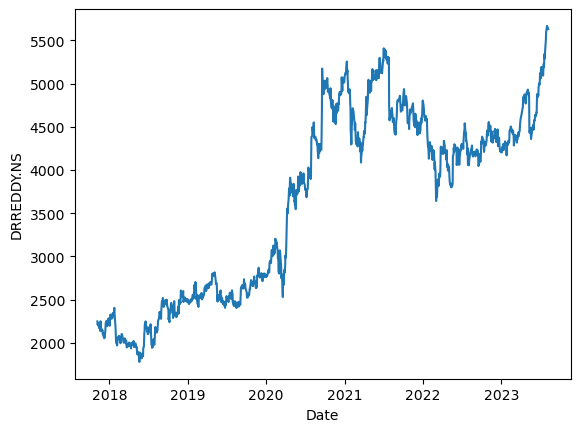

In [10]:
import matplotlib.pyplot as plt 
plt.plot(d['DRREDDY.NS'])
plt.xlabel("Date")
plt.ylabel("DRREDDY.NS")

Text(0, 0.5, 'INDUSINDBK.NS')

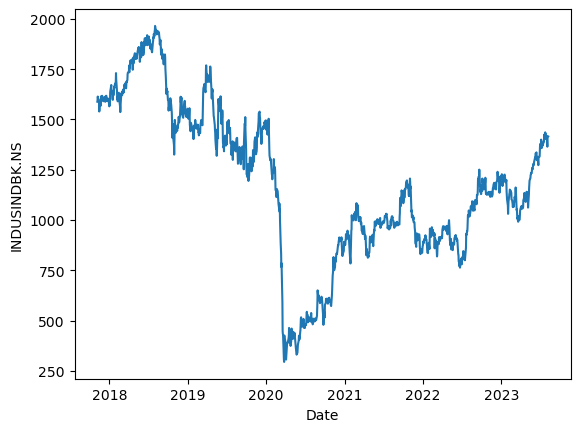

In [11]:
import matplotlib.pyplot as plt 
plt.plot(d['INDUSINDBK.NS'])
plt.xlabel("Date")
plt.ylabel("INDUSINDBK.NS")

In [12]:
def calc_returns_short(stock):
    return_stock=stock.pct_change().dropna()*100
    return return_stock

In [13]:
return1=calc_returns_short(d['DRREDDY.NS'])
return2=calc_returns_short(d['INDUSINDBK.NS'])

In [14]:
print(return1,return2)

2017-11-07 00:00:00+05:30   -0.595670
2017-11-08 00:00:00+05:30   -1.320425
2017-11-09 00:00:00+05:30    1.001435
2017-11-10 00:00:00+05:30   -0.938791
2017-11-13 00:00:00+05:30   -0.159708
                               ...   
2023-08-01 00:00:00+05:30    0.471587
2023-08-02 00:00:00+05:30   -0.116456
2023-08-03 00:00:00+05:30   -0.016787
2023-08-04 00:00:00+05:30   -0.175814
2023-08-07 00:00:00+05:30   -0.333648
Name: DRREDDY.NS, Length: 1422, dtype: float64 2017-11-07 00:00:00+05:30    0.382274
2017-11-08 00:00:00+05:30    1.215030
2017-11-09 00:00:00+05:30   -0.456885
2017-11-10 00:00:00+05:30   -0.386971
2017-11-13 00:00:00+05:30   -0.066271
                               ...   
2023-08-01 00:00:00+05:30   -1.632871
2023-08-02 00:00:00+05:30   -0.957262
2023-08-03 00:00:00+05:30   -1.212670
2023-08-04 00:00:00+05:30    3.305238
2023-08-07 00:00:00+05:30    0.400825
Name: INDUSINDBK.NS, Length: 1422, dtype: float64


In [15]:
def combined_mean(stock1_return,stock2_return,weight1,weight2):
    
    mean1=stock1_return.mean()
    mean2=stock2_return.mean()
    combined_mean2=weight1*mean1+weight2*mean2

    return combined_mean2,mean1,mean2

In [16]:
combined_meann,mean1,mean2= combined_mean(return1,return2,0.5,0.5)

In [26]:
return1.var()

2.9051979042743943

In [ ]:
#CROSS CHECKING THE RESULT

In [27]:
var1=variance(return1)

In [28]:
var1

2.9051979042743947

In [18]:
from statistics import variance
import math
import numpy as np
import statistics


In [32]:
def combined_variance(weight1,weight2,stock1_return,stock2_return):
    var1=variance(stock1_return)
    var2=variance(stock2_return)
    cov=np.cov(stock1_return,stock2_return)[0][1]
    combined_variance=(weight1**2)*var1+(weight2**2)*var2+2*weight1*weight2*cov
    
    stdev_combined=math.sqrt(combined_variance)
    return stdev_combined,combined_variance,cov
    

In [33]:
val,combined_variance,cov2=combined_variance(0.5,0.5,return1,return2)

In [34]:
cov2

0.6363800543498879

In [35]:
covar=np.cov(return1, return2)[0][1]

In [36]:
covar

0.6363800543498879

In [ ]:
#COMBINED VARAINCE IS COMING AT 3.368 BUT YOUR RESULT SHOWS 75

In [37]:
variance(return2)*(0.5**2) + variance(return1)*(0.5**2) + 2*0.5*0.5*covar

3.3686259688882747

In [41]:
def new_shapreratio(combined_mean,stdev):
    sharpe_ratio=(combined_mean-0.07)/stdev
    return sharpe_ratio

In [42]:
ratio=new_shapreratio(combined_meann,val)

In [43]:
ratio

-0.006387622851867355